# Discrete-Time Martingales

This notebook explores the main ideas from the theory of **discrete-time martingales**

We cover:

1. Conditional Expectation  
2. Martingales and Sub/Supermartingales  
3. Optional Sampling Theorem  
4. Martingale Convergence  
5. Square-Integrable Martingales  
6. Discrete-Time Stochastic Integrals  
7. Doob's Maximal Inequality  

## 1. Conditional Expectation

Intuitively, the **conditional expectation** $E[Y \mid \mathcal{F}_{n}]$ is the “best” prediction of a random variable $Y$ given only the information available up to time $n$.

---

### Definition

Let $(\Omega,\mathcal{F},P)$ be a probability space and 
$$
\mathcal{F}_n \;\subseteq\;\mathcal{F}
$$ 
a σ-algebra (filtration) representing all information from random variables $X_1,\dots,X_n$. Then $E[Y \mid \mathcal{F}_n]$ is the unique $\mathcal{F}_n$-measurable random variable satisfying  
$$
E\bigl[E[Y \mid \mathcal{F}_n]\,1_A\bigr] \;=\; E\bigl[Y\,1_A\bigr]
\quad
\text{for every }A\in\mathcal{F}_n.
$$

---

### Equivalent Density Definition

If $(X,Y)$ has joint density $f(x,y)$ with marginals $f_X(x)=\int f(x,y)\,dy$, then  
$$
E[Y \mid X=x]
\;=\;
\int_{-\infty}^{\infty} y\,\frac{f(x,y)}{f_X(x)}\,dy,
$$  
so that $E[Y\mid X]$ is a random variable of $X$.

---

### Key Properties

- **Measurability**:  
  $E[Y \mid \mathcal{F}_n]$ is a function of $X_1,\dots,X_n$.

- **Zero‐information**:  
  $E[Y \mid \mathcal{F}_0] = E[Y]$.

- **Averaging (Law of Total Expectation)**:  
  $E\bigl[E[Y \mid \mathcal{F}_n]\bigr] = E[Y]$.

- **Linearity**:  
  $E[aY + bZ \mid \mathcal{F}_n] = a\,E[Y \mid \mathcal{F}_n] + b\,E[Z \mid \mathcal{F}_n]$.

- **Tower Property**:  
  If $m<n$, then  
  $E\bigl[E[Y \mid \mathcal{F}_n]\mid\mathcal{F}_m\bigr] = E[Y \mid \mathcal{F}_m]$.

- **Taking out constants**:  
  If $Z$ is $\mathcal{F}_n$-measurable,  
  $E[Z\,Y \mid \mathcal{F}_n] = Z\,E[Y \mid \mathcal{F}_n]$.

- **Independence**:  
  If $X_1,\dots,X_n$ are independent of $Y$, then  
  $E[Y \mid \mathcal{F}_n] = E[Y]$.

---

### Filtration

A **discrete‐time filtration** $\{\mathcal{F}_n\}_{n\ge0}$ is an increasing sequence of σ-algebras, where $\mathcal{F}_n$ captures all events determined by $X_1,\dots,X_n$.  

---

### Simple Example

For i.i.d. coin‐tosses $Z_i\in\{-1,+1\}$ and $S_n=\sum_{i=1}^n Z_i$, one shows  
$$
E\bigl[S_{n+1}\,\bigm|\,\mathcal{F}_n\bigr] = S_n,
$$  
so $(S_n)$ is itself a martingale.  

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from src.conditional_expectation import (
    simulate_coin_tosses,
    build_partial_sums,
    estimate_conditional_expectation,
    estimate_conditional_expectation_sums
)

sns.set_theme(style="whitegrid")
np.random.seed(42)

In [ ]:
n_paths, n_steps = 2000, 8
t = 3

In [ ]:
tosses = simulate_coin_tosses(n_paths=n_paths, n_steps=n_steps)
S = build_partial_sums(tosses)

hist_est = estimate_conditional_expectation(tosses, t)
sum_est = estimate_conditional_expectation_sums(S, t)

In [ ]:
print("E[Z_{t+1} | history]  (first 5):")
for i, (h, v) in enumerate(hist_est.items()):
    print(f"  {h} → {v:.3f}")
    if i == 4: break

print("\nE[S_{t+1} | S_t] (sorted by S_t):")
for s, v in sorted(sum_est.items()):
    print(f"  S_t = {s:2d} → {v:.3f}")

E[Z_{t+1} | history]  (first 5):
  (np.int64(-1), np.int64(1), np.int64(-1), np.int64(-1)) → 0.080
  (np.int64(1), np.int64(1), np.int64(1), np.int64(-1)) → 0.015
  (np.int64(1), np.int64(1), np.int64(1), np.int64(1)) → 0.059
  (np.int64(-1), np.int64(-1), np.int64(1), np.int64(1)) → 0.036
  (np.int64(1), np.int64(1), np.int64(-1), np.int64(1)) → -0.092

E[S_{t+1} | S_t] (sorted by S_t):
  S_t = -4 → -3.927
  S_t = -2 → -1.940
  S_t =  0 → -0.010
  S_t =  2 → 1.982
  S_t =  4 → 4.059


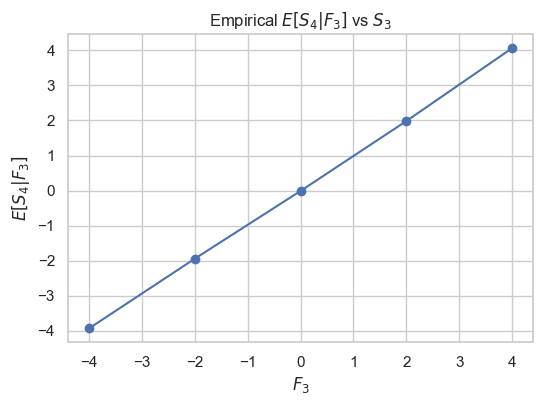

In [ ]:
x, y = zip(*sorted(sum_est.items()))

plt.figure(figsize=(6,4))
plt.plot(x, y, marker='o')
plt.title(f"Empirical $E[S_{{{t+1}}} | F_{{{t}}}]$ vs $S_{t}$")
plt.xlabel(f"$F_{t}$")
plt.ylabel(f"$E[S_{{{t+1}}} | F_{{{t}}}]$")
plt.grid(True)
plt.show()

## 2. Martingales

A **martingale** models a “fair game” under a filtration $\{\mathcal{F}_n\}$.  
A process $(M_n)_{n\ge0}$ is a martingale if:

1. $M_n$ is $\mathcal{F}_n$-measurable and $E[\,|M_n|\,]<\infty$.
2. **Martingale property**: for all $m < n$,
   $$
   E[M_n \mid \mathcal{F}_m] = M_m
   $$
   or equivalently,
   $$
   E[M_{n+1} - M_n \mid \mathcal{F}_n] = 0
   $$

---

### Common Examples

- **Symmetric random walk**  
  Let $X_1, X_2, \dots$ be i.i.d. with $E[X_j] = 0$, and define $S_n = \sum_{j=1}^n X_j$. Then:
  $$
  E[S_{n+1} \mid \mathcal{F}_n] = S_n + E[X_{n+1} \mid \mathcal{F}_n] = S_n
  $$
  so $(S_n)$ is a martingale.

- **Variance-corrected walk**  
  If in addition $\operatorname{Var}(X_j) = \sigma_j^2$, then define:
  $$
  A_n = \sum_{j=1}^n \sigma_j^2, \quad M_n = S_n^2 - A_n
  $$
  Then $(M_n)$ is a martingale: $E[M_{n+1} \mid \mathcal{F}_n] = M_n$.

---

### Discrete Stochastic Integral

Let $(M_n)$ be a martingale, and let $\{B_j\}$ be a predictable sequence, i.e., each $B_j$ is $\mathcal{F}_{j-1}$-measurable and bounded.  
Define the stochastic integral:
$$
W_n = \sum_{j=1}^n B_j (M_j - M_{j-1})
$$
Then $(W_n)$ is a martingale.

This is because:
$$
E[W_{n+1} \mid \mathcal{F}_n] = E[W_n + B_{n+1}(M_{n+1} - M_n) \mid \mathcal{F}_n] = W_n
$$

---

### Martingale Betting Paradox

In the **double-or-nothing** betting strategy, we define $W_n$ such that with probability $1$ we eventually win:
$$
W_n = \sum_{j=1}^n B_j X_j, \quad \text{where } B_j = 2^{j-1} \text{ if we keep losing}
$$
Then $E[W_n] = 0$ for all $n$, but $W_\infty = 1$ almost surely, so:
$$
E[W_\infty] = 1 > 0 = E[W_0]
$$
This shows that optional stopping at an **unbounded** stopping time breaks the martingale fairness.

---

### Submartingales and Supermartingales

- A process $(M_n)$ is a **submartingale** if:
  $$
  E[M_{n+1} \mid \mathcal{F}_n] \ge M_n
  $$

- A process $(M_n)$ is a **supermartingale** if:
  $$
  E[M_{n+1} \mid \mathcal{F}_n] \le M_n
  $$

- A martingale is both a submartingale and a supermartingale.

---

We simulate the classic **martingale doubling strategy** on a fair coin:
- At time 1, bet \$1.
- If you lose, double the bet on the next toss: \$2, \$4, \$8, etc.
- Stop betting once you win.

Let:
- $X_j \in \{-1, +1\}$ be the coin toss outcome.
- $B_j$ be the bet at time $j$, predictable and $\mathcal{F}_{j-1}$-measurable.
- $W_n = \sum_{j=1}^n B_j X_j$ be the cumulative winnings.

This is a **stochastic integral**:
\[
W_n = \sum_{j=1}^n B_j (M_j - M_{j-1}), \quad \text{where } M_j = \sum_{i=1}^j X_i
\]

If $M_n$ is a martingale and $B_j$ is predictable and bounded, then $W_n$ is also a martingale.

In [24]:
from src.martingales import (
    simulate_martingale_betting_strategy,
    check_martingale_property_by_time
)

# Parameters
n_paths = 1000
n_steps = 20
seed = 42

In [25]:
X, B, W = simulate_martingale_betting_strategy(n_paths=n_paths, n_steps=n_steps, seed=seed)
diffs = check_martingale_property_by_time(W)

In [26]:
print("Global E[W_{t+1}] ≈ E[W_t] check at each time step:")
for t, ok in enumerate(diffs):
    print(f"  t = {t:2d} → {'✔️' if ok else '❌'}")

print("\nMartingale by global means?", all(diffs))

Global E[W_{t+1}] ≈ E[W_t] check at each time step:
  t =  0 → ❌
  t =  1 → ❌
  t =  2 → ❌
  t =  3 → ❌
  t =  4 → ✔️
  t =  5 → ✔️
  t =  6 → ✔️
  t =  7 → ❌
  t =  8 → ❌
  t =  9 → ❌
  t = 10 → ✔️
  t = 11 → ✔️
  t = 12 → ✔️
  t = 13 → ✔️
  t = 14 → ✔️
  t = 15 → ✔️
  t = 16 → ✔️
  t = 17 → ✔️
  t = 18 → ✔️

Martingale by global means? False


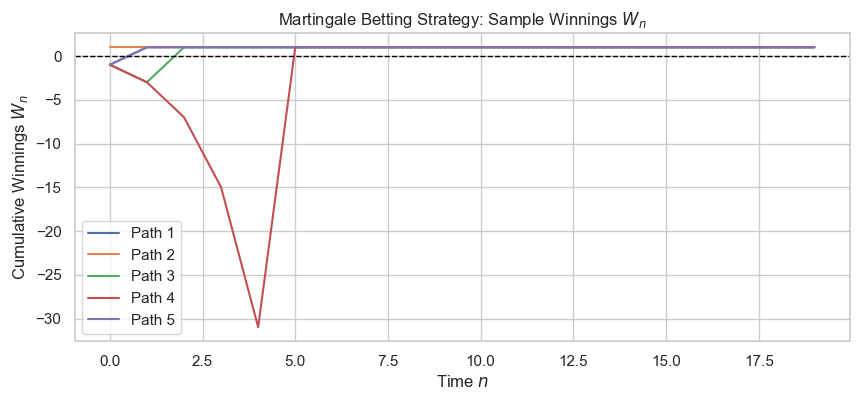

In [30]:
import matplotlib.pyplot as plt

# Plot a few sample paths of winnings W_n
plt.figure(figsize=(10, 4))
for i in range(5):
    plt.plot(W[i], label=f"Path {i+1}")
plt.axhline(y=0, color='black', linestyle='--', linewidth=1)
plt.title("Martingale Betting Strategy: Sample Winnings $W_n$")
plt.xlabel("Time $n$")
plt.ylabel("Cumulative Winnings $W_n$")
plt.grid(True)
plt.legend()
plt.show()